In [6]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col="DATE")

In [7]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [8]:
valid_columns = weather.columns[null_pct < .05]

In [9]:
weather = weather[valid_columns].copy()

In [10]:
weather.columns = weather.columns.str.lower()

In [11]:
weather = weather.ffill()

In [12]:
weather.apply(pd.isnull).sum()

station            0
name               0
prcp               0
prcp_attributes    0
snow               0
snow_attributes    0
snwd               0
snwd_attributes    0
tmax               0
tmax_attributes    0
tmin               0
tmin_attributes    0
dtype: int64

In [13]:
weather.dtypes

station             object
name                object
prcp               float64
prcp_attributes     object
snow               float64
snow_attributes     object
snwd               float64
snwd_attributes     object
tmax                 int64
tmax_attributes     object
tmin                 int64
tmin_attributes     object
dtype: object

In [14]:
weather.index

Index(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04', '1979-01-05',
       '1979-01-06', '1979-01-07', '1979-01-08', '1979-01-09', '1979-01-10',
       ...
       '2013-06-03', '2013-06-04', '2013-06-05', '2013-06-06', '2013-06-07',
       '2013-06-08', '2013-06-09', '2013-06-10', '2013-06-11', '2013-06-12'],
      dtype='object', name='DATE', length=12522)

In [15]:
weather.index = pd.to_datetime(weather.index)

In [16]:
weather.index.year.value_counts().sort_index()

DATE
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    361
1993    310
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    163
Name: count, dtype: int64

<Axes: xlabel='DATE'>

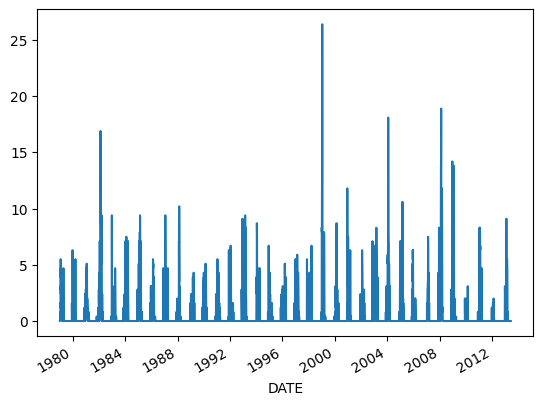

In [17]:
weather["snwd"].plot()

In [18]:
weather

,station,name,prcp,prcp_attributes,snow,snow_attributes,snwd,snwd_attributes,tmax,tmax_attributes,tmin,tmin_attributes
DATE,,,,,,,,,,,,
1979-01-01,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.21,",,C",0.0,"T,,C",0.0,",,C",48,",,C",26,",,C"
1979-01-02,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,"T,,C",0.0,",,C",26,",,C",6,",,C"
1979-01-03,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,"T,,C",0.0,",,C",11,",,C",2,",,C"
1979-01-04,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.03,",,C",0.5,",,C",0.0,",,C",15,",,C",7,",,C"
1979-01-05,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,"T,,C",0.4,",,C",12,",,C",4,",,C"
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-08,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,",,C",0.0,"T,,C",69,",,C",55,",,C"
2013-06-09,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,",,C",0.0,",,C",0.0,"T,,C",73,",,C",52,",,C"
2013-06-10,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.87,",,C",0.0,",,C",0.0,"T,,C",63,",,C",60,",,C"


In [19]:
weather["target"] = weather.shift(-1)["tmax"]

In [20]:
weather

,station,name,prcp,prcp_attributes,snow,snow_attributes,snwd,snwd_attributes,tmax,tmax_attributes,tmin,tmin_attributes,target
DATE,,,,,,,,,,,,,
1979-01-01,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.21,",,C",0.0,"T,,C",0.0,",,C",48,",,C",26,",,C",26.0
1979-01-02,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,"T,,C",0.0,",,C",26,",,C",6,",,C",11.0
1979-01-03,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,"T,,C",0.0,",,C",11,",,C",2,",,C",15.0
1979-01-04,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.03,",,C",0.5,",,C",0.0,",,C",15,",,C",7,",,C",12.0
1979-01-05,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,"T,,C",0.4,",,C",12,",,C",4,",,C",20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-08,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,",,C",0.0,"T,,C",69,",,C",55,",,C",73.0
2013-06-09,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,",,C",0.0,",,C",0.0,"T,,C",73,",,C",52,",,C",63.0
2013-06-10,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.87,",,C",0.0,",,C",0.0,"T,,C",63,",,C",60,",,C",74.0


In [21]:
weather = weather.ffill()

In [22]:
weather

,station,name,prcp,prcp_attributes,snow,snow_attributes,snwd,snwd_attributes,tmax,tmax_attributes,tmin,tmin_attributes,target
DATE,,,,,,,,,,,,,
1979-01-01,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.21,",,C",0.0,"T,,C",0.0,",,C",48,",,C",26,",,C",26.0
1979-01-02,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,"T,,C",0.0,",,C",26,",,C",6,",,C",11.0
1979-01-03,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,"T,,C",0.0,",,C",11,",,C",2,",,C",15.0
1979-01-04,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.03,",,C",0.5,",,C",0.0,",,C",15,",,C",7,",,C",12.0
1979-01-05,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,"T,,C",0.4,",,C",12,",,C",4,",,C",20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-08,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,"T,,C",0.0,",,C",0.0,"T,,C",69,",,C",55,",,C",73.0
2013-06-09,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,",,C",0.0,",,C",0.0,"T,,C",73,",,C",52,",,C",63.0
2013-06-10,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.87,",,C",0.0,",,C",0.0,"T,,C",63,",,C",60,",,C",74.0


In [25]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [27]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [28]:
predictors

Index(['prcp', 'prcp_attributes', 'snow', 'snow_attributes', 'snwd',
       'snwd_attributes', 'tmax', 'tmax_attributes', 'tmin',
       'tmin_attributes'],
      dtype='object')

In [29]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        
        combined.columns = ["actual", "prediction"]
        
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)